<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Neural Networks

## *Data Science Unit 4 Sprint 2 Assignment 1*

## Define the Following:
You can add image, diagrams, whatever you need to ensure that you understand the concepts below.

### Input Layer:(visible layer)
-
This represents the layer that receives from our data, visible because its the only part that is exposed to our data and interacts directly with our data. 

### Hidden Layer:
-
We don't iteract with directly. Nothing outside the NN interacts with this layer

### Output Layer:
-
final layer, output vector of values in format suitable for the problem solution. This output is typically modified by an activation function


### Neuron:
-
This is one of the dots on the node maps, or one feature - layers are composed of one or more neurons

### Weight:
-
this is a float value, a neurons input is multiplied but this 

### Activation Function:
-
similar to a threshold for a neuron to fire in the brain this is what decides what information is passed forward. sigmoid tanh step and relu are all options 


### Node Map:
-
Typically drawn with one input node for each input/feature/column of the dataset 

### Perceptron:
-
A simple neural network with no hidden layers. Binary classifier with limitations. 

## Inputs -> Outputs

### Explain the flow of information through a neural network from inputs to outputs. Be sure to include: inputs, weights, bias, and activation functions. How does it all flow from beginning to end?

#### Your Answer Here

## Write your own perceptron code that can correctly classify (99.0% accuracy) a NAND gate. 

| x1 | x2 | y |
|----|----|---|
| 0  | 0  | 1 |
| 1  | 0  | 1 |
| 0  | 1  | 1 |
| 1  | 1  | 0 |

In [3]:
import pandas as pd
import numpy as np

data = { 'x1': [0,1,0,1],
         'x2': [0,0,1,1],
         'y':  [1,1,1,0]
       }

df = pd.DataFrame.from_dict(data).astype('int')

In [5]:
##### Your Code Here #####
df.head()

,x1,x2,y
0,0,0,1
1,1,0,1
2,0,1,1
3,1,1,0


In [7]:
inputs = np.array(df)
correct_outputs = [[0],[1],[0],[1]]

In [8]:
inputs

array([[0, 0, 1],
       [1, 0, 1],
       [0, 1, 1],
       [1, 1, 0]])

In [9]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    sx = sigmoid(x)
    return sx * (1-sx)

In [13]:
#random weight for our three input
weights = 2 * np.random.random((3,1)) - 1
weights

array([[ 0.08391524],
       [-0.1857847 ],
       [ 0.87464428]])

In [12]:
#weighted sum is dot product of input and weight 
weighted_sum = np.dot(inputs, weights)
weighted_sum

array([[ 0.26550192],
       [ 0.15288396],
       [-0.70665703],
       [-1.08477692]])

In [14]:
#activated output is the sigmoid of the weighted sum 
activated_output = sigmoid(weighted_sum)
activated_output

array([[0.5659883 ],
       [0.53814672],
       [0.33033793],
       [0.25260309]])

In [15]:
#error is the correct output minus activated output 
error = correct_outputs - activated_output
error

array([[-0.5659883 ],
       [ 0.46185328],
       [-0.33033793],
       [ 0.74739691]])

In [16]:
# Gradient Descent Magic 
#adjustment equals error times the sigmoid derivative of the weighted sum
adjustments = error * sigmoid_derivative(weighted_sum)
adjustments


array([[-0.1390325 ],
       [ 0.11479124],
       [-0.07307563],
       [ 0.14110463]])

In [17]:
#weights are incremented by the dot product of the inputs(transposed) and adjustments
weights += np.dot(inputs.T, adjustments)
weights

array([[ 0.33981111],
       [-0.11775571],
       [ 0.77732738]])

# The full monty

In [23]:
# putting together everything above

#we have
#weights - randomly initialized values to start from
#inputs - numpy array of values from our df (xtrain basically)
#correct_outputs - this is the correct answer (ytrain basically)

# weights updated 100 times, then 1000 then 10000 then more
for iteration in range(10000):
    
    weighted_sum = np.dot(inputs, weights)
    
    activated_output = sigmoid(weighted_sum)
    
    error = correct_outputs - activated_output
    
    adjustments = error * sigmoid_derivative(weighted_sum)
    
    weights += np.dot(inputs.T, adjustments)
    
print("Weights after training")
print(weights)

print("Output after training")
print(activated_output)

Weights after training
[[13.73064069]
 [-1.70584825]
 [-6.77206104]]
Output after training
[[1.14402187e-03]
 [9.99050456e-01]
 [2.07969987e-04]
 [9.99994006e-01]]


## Implement your own Perceptron Class and use it to classify a binary dataset: 
- [The Pima Indians Diabetes dataset](https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv) 

You may need to search for other's implementations in order to get inspiration for your own. There are *lots* of perceptron implementations on the internet with varying levels of sophistication and complexity. Whatever your approach, make sure you understand **every** line of your implementation and what its purpose is.

In [9]:
diabetes = pd.read_csv('https://raw.githubusercontent.com/ryanleeallred/datasets/master/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Although neural networks can handle non-normalized data, scaling or normalizing your data will improve your neural network's learning speed. Try to apply the sklearn `MinMaxScaler` or `Normalizer` to your diabetes dataset. 

In [10]:
from sklearn.preprocessing import MinMaxScaler, Normalizer

feats = list(diabetes)[:-1]

X = list(diabetes)[:-1]
y = 'Outcome'

# X = diabetes.iloc[:, 0:8].values
# y = diabetes.iloc[:, -1:].values
features = list(diabetes)[:-1]
target = 'Outcome'

In [20]:
scaler = MinMaxScaler()

X_scaled = scaler.fit_transform(diabetes[features])
y = diabetes[target]

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=4545454)

In [29]:
##### Update this Class #####

class Perceptron:
    
    def __init__(self, rate = 0.01, niter = 1000):
        self.rate = rate
        self.niter = niter
    
    def __sigmoid(self, x):
         return 1 / (1 + np.exp(-x))
    
    def __sigmoid_derivative(self, x):
        sx = sigmoid(x)
        return sx * (1-sx)

    def fit(self, X, y):
        """Fit training data
        X : Training vectors, X.shape : [#samples, #features]
        y : Target values, y.shape : [#samples]
        """

        # Randomly Initialize Weights
        self.weight = np.zeros(X.shape[1])
        self.bias = np.ones(1 + X.shape[0])
        self.errors = []
        
        for i in range(self.niter):
            err = 0
            
            for xi, target in zip(X, y):
                # Weighted sum of inputs / weights
                delta_w = self.rate * (target - self.predict(xi))

                # Activate!
                self.weight[:] += delta_w * xi
                self.weight[0] += delta_w
                # Cac error
                err += int(delta_w != 0.0)
            self.errors.append(err)
        return self
    def net_input(self, X):
        return np.dot(X, self.weight)

    def predict(self, X):
        """Return class label after unit step"""
        return np.where(self.net_input(X) >= 0.5, 1, 0)

In [30]:
from sklearn.metrics import accuracy_score

model = Perceptron()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
y_pred = [1 if x >=0.5 else 0 for x in y_pred]

accuracy = accuracy_score(y_pred, y_test)

In [31]:
accuracy

0.8020833333333334

In [36]:
ceptron.fit(X_train, y_train)

In [37]:
ceptron.fit(X_scaled, y)

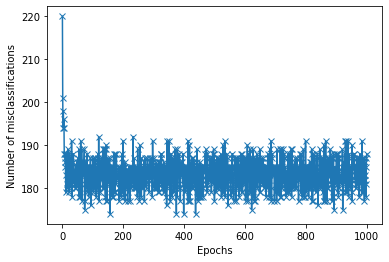

In [42]:
import matplotlib.pyplot as plt


plt.plot(range(1, len(ceptron.errors) + 1), ceptron.errors, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();


In [43]:
ceptron2 = Perceptron(0.01, 200)

In [44]:
ceptron2.fit(X_train, y_train)

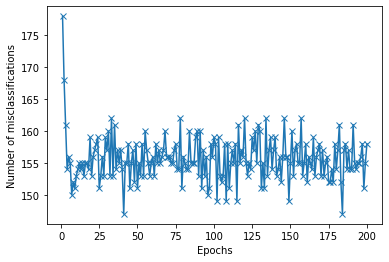

In [45]:
plt.plot(range(1, len(ceptron2.errors) + 1), ceptron2.errors, marker='x')
plt.xlabel('Epochs')
plt.ylabel('Number of misclassifications')
plt.show();


## Stretch Goals:

- Research "backpropagation" to learn how weights get updated in neural networks (tomorrow's lecture). 
- Implement a multi-layer perceptron. (for non-linearly separable classes)
- Try and implement your own backpropagation algorithm.
- What are the pros and cons of the different activation functions? How should you decide between them for the different layers of a neural network?